<a href="https://colab.research.google.com/github/M1croZavr/ML_opt/blob/development/User_interface_notebook_regression_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mloptima

  Preparing metadata (setup.py) ... done
  Created wheel for mloptima: filename=mloptima-0.0.1-py3-none-any.whl size=33743 sha256=84d5a719f6d959357349abbf9a2971b7a194b66d40b787b30d41fb64e0f0cb84
  Stored in directory: /root/.cache/pip/wheels/a1/99/19/347e881e4c186860f9f1c4e8ffc0f8c490f773b0a0ac91b959
Successfully built mloptima


In [4]:
from coreml.regression import models
import numpy as np
from sklearn import datasets

# Модель линейной регрессии

In [5]:
# Задать необходимые значения X и Y
X, y = datasets.make_regression(25000, 2, noise=0.4, n_informative=1)

In [6]:
def inputData():
  usereg = bool(int(input('Should we use a regularization? , 1 - yes, 0 - no: ')))
  if usereg:
    regtype=str(input('Enter the type of regularization: l1, l2: '))
  else:
    regtype=None
  plotdraw = bool(int(input('Should we draw a plot , 1 - yes, 0 - no: ')))
  dopparam=bool(int(input('Should we change const parameters? , 1 - yes, 0 - no: ')))
  if dopparam:
    lrd=float(input('Enter the Learning rate in SGD, default=0.01:'))
    epsd=float(input('Enter the Convergence condition coefficient in SGD, default=0.05:'))
    if usereg:
      cd=float(input('Enter the Regularization coefficient if regularization is provided, default=0.01:'))
  else:
    lrd=0.01
    epsd=0.05
    cd=0.01
  return regtype,plotdraw,lrd,epsd,cd

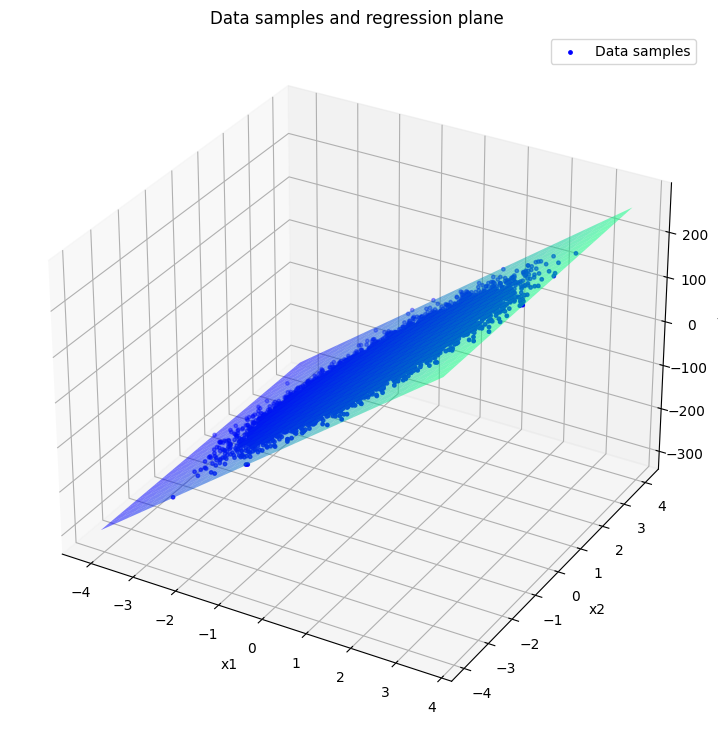

y = -0.009517064458364307 + 72.6232856028068x1 + 0.014605104990846588x2


In [7]:
# Воспользуйтесь API класса
model = models.LinearRegression('l1', 0.01, c=0.3, plot=True)
model.fit(X, y)
print(model)

Should we use a regularization? , 1 - yes, 0 - no: 1
Enter the type of regularization: l1, l2: l2
Should we draw a plot , 1 - yes, 0 - no: 1
Should we change const parameters? , 1 - yes, 0 - no: 0


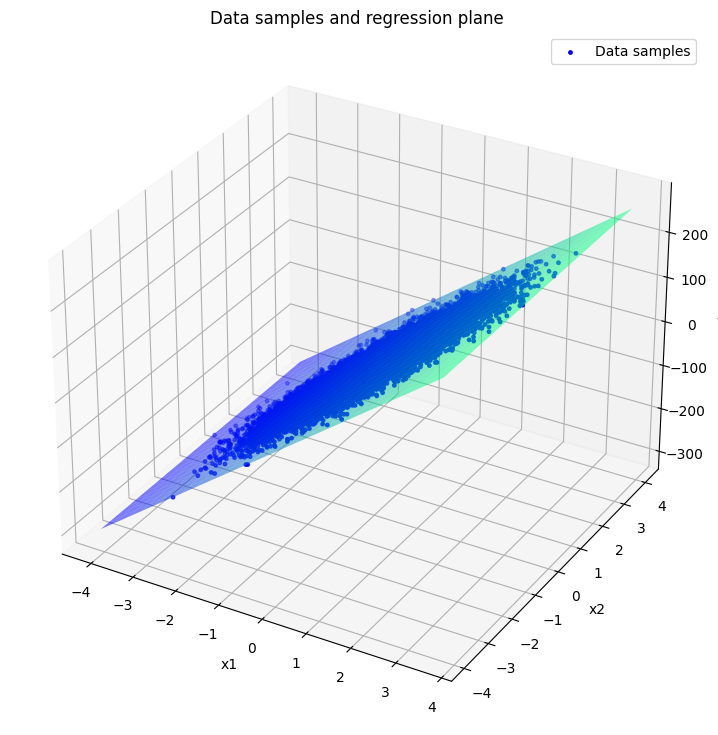

Analytical view: y = -0.014893148166508038 + 72.14009930404664x1 + -0.08160691877222176x2
Regressors weights [72.1400993  -0.08160692]
Intercept of the regression -0.014893148166508038


In [8]:
# Или воспользуйтесь ячейкой
regtype, plot, lr, eps, c = inputData()
model = models.LinearRegression(regtype, lr=lr, eps=eps, c=c, plot=plot).fit(X, y)
print('Analytical view:', str(model))
print('Regressors weights', model.w[1:])
print('Intercept of the regression', model.w[0])

# Модель полиномиальной регрессии

In [9]:
# Задаем тренировочные данные
X = np.random.uniform(1, 10, (15000, 2))
y = np.sin(X[:, 0]) + np.cos(X[:, 1])

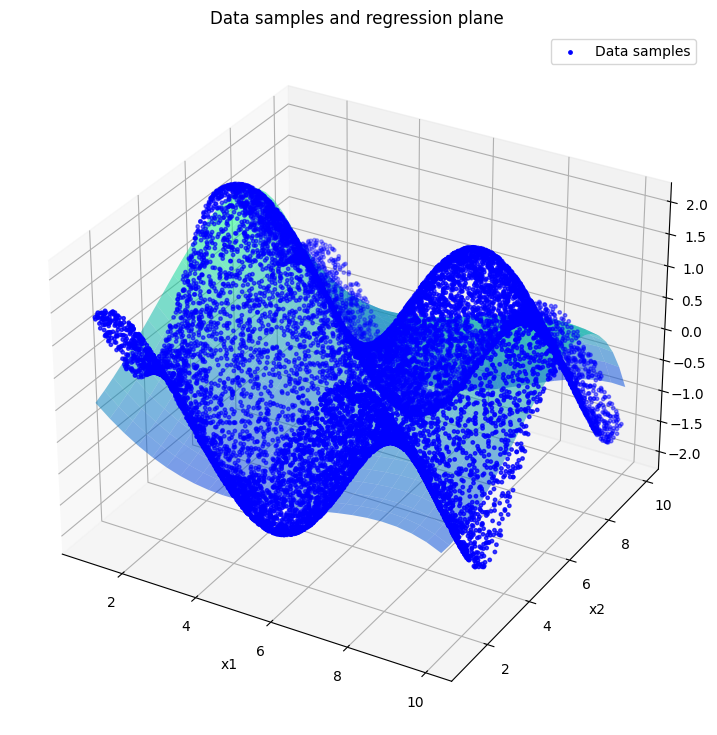

y = 0.06791792399682604 + -1.5759021926165464x1 + 0.36426893075377614x2 + 1.8381203218181363x3 + -0.9993351686269152x4 + 1.4341811617953055x5 + 1.290784315753108x6 + 0.6254687676165912x7 + 0.286501756790058x8 + 0.05653154651299248x9 + -1.5472148976481233x10 + -0.4530579305197589x11 + 0.8187730582822778x12 + -0.5711577433127932x13 + -1.6141328865913398x14


In [10]:
# Воспользуйтесь API класса, обучите модель
model = models.PolynomialRegression(degree=4, plot=True)
model.fit(X, y)
print(model)

# Модель экспоненциальной регрессии

In [11]:
# Задаем тренировочные данные
X = np.random.uniform(1, 3, (10000, 2))
y = np.exp(X[:, 0]) + np.random.randn(X[:, 0].shape[0]) * 0.1

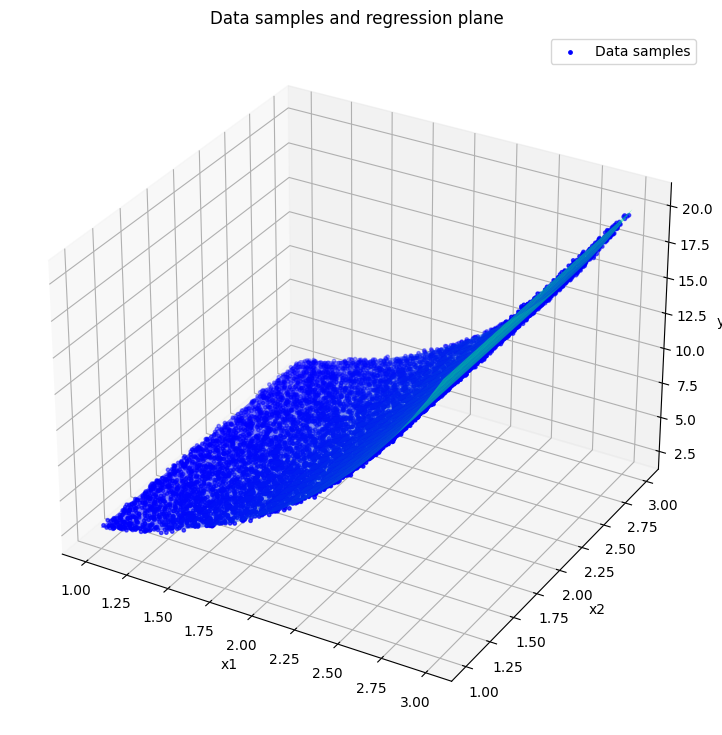

y = 0.9979477446490633 * 2.7203931146750264 ** x1 * 1.0001133862958942 ** x2


In [12]:
# Воспользуйтесь API класса, обучите модель
model = models.ExpRegression('l2', plot=True)
model.fit(X, y)
print(model)